In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Survey_data_cleaned.csv')

In [3]:
df

,Job title,Age,Industry,Salary,Bonus,total_salary,Country,State,City,Overall_experience,Field_experience,Degree,Gender,Race
0,research and instruction librarian,25-34,education (higher education),55000.0,0.0,55000.000000,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,marketing specialist,25-34,"accounting, banking & finance",34000.0,0.0,34000.000000,United States,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
2,program manager,25-34,nonprofits,62000.0,3000.0,65000.000000,United States,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
3,accounting manager,25-34,"accounting, banking & finance",60000.0,7000.0,67000.000000,United States,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White
4,scholarly publishing librarian,25-34,education (higher education),62000.0,0.0,62000.000000,United States,New Hampshire,Hanover,8 - 10 years,2 - 4 years,Master's degree,Man,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25466,waitress,18-24,hospitality & events,35000.0,10000.0,45000.000000,United States,New York,Rochester,5-7 years,2 - 4 years,Some college,Woman,White
25467,porting agent,35-44,computing or tech,60000.0,5000.0,65000.000000,United States,Georgia,Atlanta,21 - 30 years,2 - 4 years,Some college,Man,"Hispanic, Latino, or Spanish origin"
25468,post-doctoral associate,25-34,research / gov,83000.0,0.0,83000.000000,United States,District of Columbia,Dc,2 - 4 years,2 - 4 years,PhD,Man,White
25469,crm manager,25-34,"accounting, banking & finance",57000.0,0.0,70826.723094,United Kingdom,Other,London,5-7 years,2 - 4 years,Some college,Woman,White


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25471 entries, 0 to 25470
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Job title           25471 non-null  object 
 1   Age                 25471 non-null  object 
 2   Industry            25471 non-null  object 
 3   Salary              25471 non-null  float64
 4   Bonus               25471 non-null  float64
 5   total_salary        25471 non-null  float64
 6   Country             25471 non-null  object 
 7   State               25471 non-null  object 
 8   City                25393 non-null  object 
 9   Overall_experience  25471 non-null  object 
 10  Field_experience    25471 non-null  object 
 11  Degree              25471 non-null  object 
 12  Gender              25471 non-null  object 
 13  Race                25471 non-null  object 
dtypes: float64(3), object(11)
memory usage: 2.7+ MB


In [5]:
df.describe()

,Salary,Bonus,total_salary
count,2.547100e+04,2.547100e+04,2.547100e+04
mean,8.937548e+04,8.940169e+03,9.711480e+04
std,6.896547e+04,3.849046e+04,8.684058e+04
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.500000e+04,0.000000e+00,5.520000e+04
50%,7.605000e+04,0.000000e+00,7.800000e+04
75%,1.100000e+05,5.700000e+03,1.145000e+05
max,5.000044e+06,1.500000e+06,5.004044e+06


# Data Preparation

In [6]:
# assign all categorical columns to cat_cols
cat_cols = ['Job title', 'Age', 'Industry',
            'Country', 'State', 'City', 'Overall_experience', 'Field_experience',
            'Degree', 'Gender', 'Race']

In [7]:
df[cat_cols] = df[cat_cols].astype('category')

In [8]:
df.columns

Index(['Job title', 'Age', 'Industry', 'Salary', 'Bonus', 'total_salary',
       'Country', 'State', 'City', 'Overall_experience', 'Field_experience',
       'Degree', 'Gender', 'Race'],
      dtype='object')

In [9]:
# fill nan values with Other
df['City'].fillna('Other', inplace=True)

# Data Visualization

<Axes: xlabel='Age', ylabel='total_salary'>

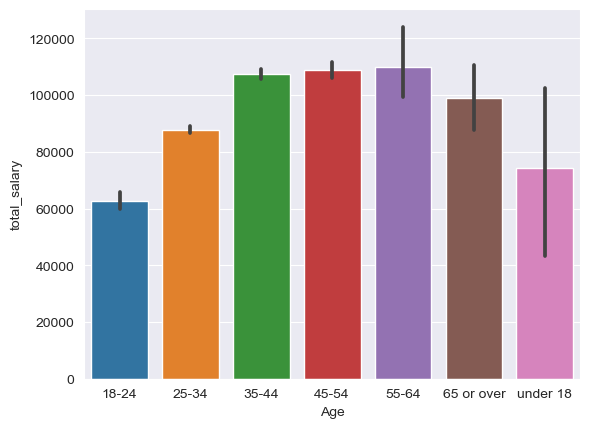

In [10]:
sns.barplot(data = df, x = 'Age', y = 'total_salary')

In [11]:
pd.pivot_table(df, index='Age', values='total_salary', aggfunc=np.mean).sort_values(by='total_salary', ascending=False)

,total_salary
Age,
55-64,109907.162851
45-54,108727.485698
35-44,107388.337043
65 or over,98872.732724
25-34,87844.686065
under 18,74320.000000
18-24,62771.735708


## people with age 50-59 have the highest average salary that's because their experience but surprisingly people with age over 65 don't have the highest average salary

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '1 year or less'),
  Text(1, 0, '11 - 20 years'),
  Text(2, 0, '2 - 4 years'),
  Text(3, 0, '21 - 30 years'),
  Text(4, 0, '31 - 40 years'),
  Text(5, 0, '41 years or more'),
  Text(6, 0, '5-7 years'),
  Text(7, 0, '8 - 10 years')])

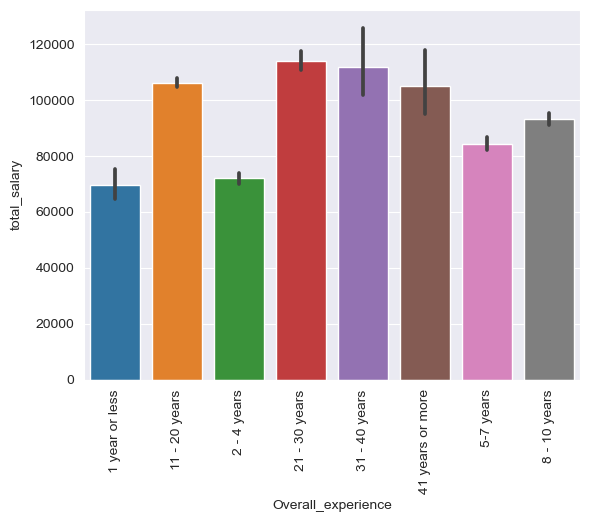

In [12]:
sns.barplot(data = df, x = 'Overall_experience', y = 'total_salary')
plt.xticks(rotation=90)

In [13]:
pd.pivot_table(data=df, index='Overall_experience', values='total_salary', aggfunc=np.mean).sort_values(by='total_salary', ascending=False)

,total_salary
Overall_experience,
21 - 30 years,114090.473113
31 - 40 years,111734.045997
11 - 20 years,106323.348153
41 years or more,104942.325453
8 - 10 years,93272.257849
5-7 years,84355.837268
2 - 4 years,72038.258901
1 year or less,69480.384796


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '1 year or less'),
  Text(1, 0, '11 - 20 years'),
  Text(2, 0, '2 - 4 years'),
  Text(3, 0, '21 - 30 years'),
  Text(4, 0, '31 - 40 years'),
  Text(5, 0, '41 years or more'),
  Text(6, 0, '5-7 years'),
  Text(7, 0, '8 - 10 years')])

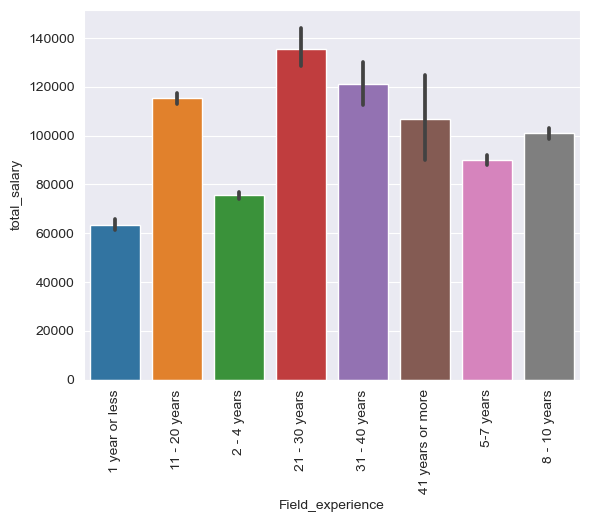

In [14]:
sns.barplot(data = df, x = 'Field_experience', y = 'total_salary')
plt.xticks(rotation=90)

In [15]:
pd.pivot_table(data=df, index='Field_experience', values='total_salary', aggfunc=np.mean).sort_values(by='total_salary', ascending=False)

,total_salary
Field_experience,
21 - 30 years,135662.897104
31 - 40 years,121163.114507
11 - 20 years,115243.511545
41 years or more,106779.269398
8 - 10 years,100932.100088
5-7 years,89951.368681
2 - 4 years,75542.904542
1 year or less,63428.423786


## This plot shows that people with the highest experience don't have the highest average salary and this explains why people with age over 65 don't have the highest average salary

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'College degree'),
  Text(1, 0, 'High School'),
  Text(2, 0, "Master's degree"),
  Text(3, 0, 'PhD'),
  Text(4, 0, 'Professional degree (MD, JD, etc.)'),
  Text(5, 0, 'Some college')])

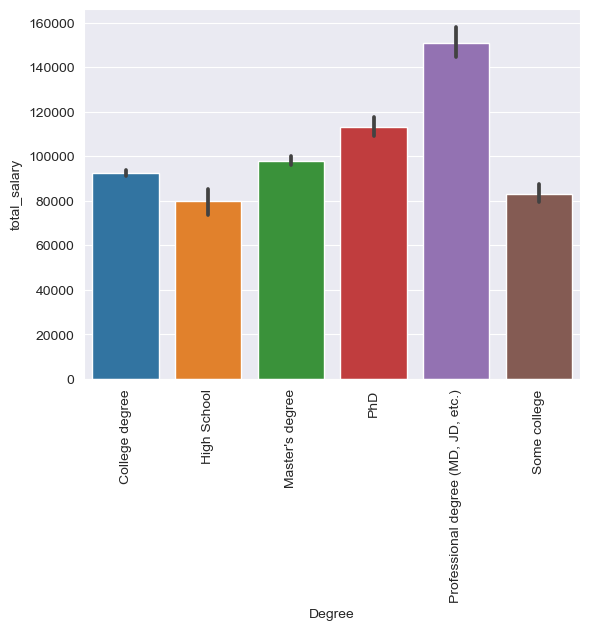

In [16]:
sns.barplot(data = df, x = 'Degree', y = 'total_salary')
plt.xticks(rotation=90)

In [17]:
pd.pivot_table(data=df, index='Degree', values='total_salary', aggfunc=np.mean).sort_values(by='total_salary', ascending=False)

,total_salary
Degree,
"Professional degree (MD, JD, etc.)",150932.229303
PhD,113092.791833
Master's degree,97960.178348
College degree,92460.317210
Some college,82953.597126
High School,79718.586301


## people with Professional degree by far have the highest average salary and people with no degree have the lowest average salary like High school

<Axes: xlabel='Gender', ylabel='total_salary'>

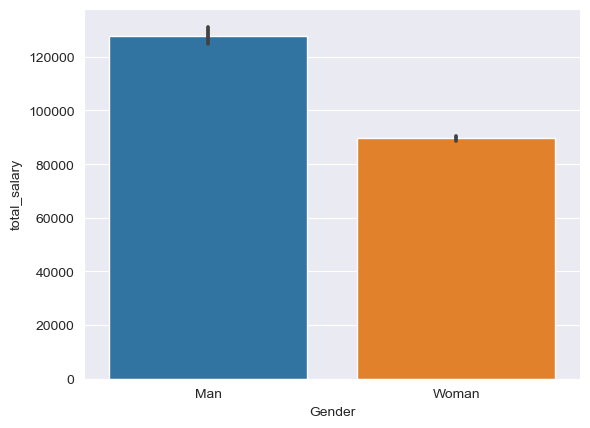

In [18]:
sns.barplot(data = df, x = 'Gender', y = 'total_salary')

In [19]:
pd.pivot_table(data = df, index= 'Gender', values = 'total_salary', aggfunc=np.mean).sort_values(by='total_salary', ascending=False)

,total_salary
Gender,
Man,127770.144124
Woman,89569.443788


## Looks like men have the highest average salary, lets see if this is true by comparing the salaries in the top 10 industries

In [20]:
# get the top 10 industries
top_10_industries = dict(df.Industry.value_counts().head(10))
top_10_industries.keys()

dict_keys(['computing or tech', 'education (higher education)', 'nonprofits', 'health care', 'government and public administration', 'accounting, banking & finance', 'engineering or manufacturing', 'marketing, advertising & pr', 'law', 'education (primary/secondary)'])

In [21]:
pd.pivot_table(data = df[df['Industry'].isin(top_10_industries.keys())], index= ['Industry' ,'Gender'], values = 'total_salary', aggfunc=np.mean).sort_values('Industry', ascending=False)

total_salary
Industry                             Gender               
nonprofits                           Woman    71564.034766
                                     Man      81198.063746
marketing, advertising & pr          Woman    90705.183315
                                     Man     102480.799298
law                                  Woman   124159.886202
                                     Man     175042.243541
health care                          Woman    92026.222989
                                     Man     105844.056380
government and public administration Woman    79270.911352
                                     Man      88637.407972
engineering or manufacturing         Woman    99487.674782
                                     Man     111643.207653
education (primary/secondary)        Woman    64901.971279
                                     Man      66822.809293
education (higher education)         Woman    67377.251227
                                     Man      78691.417829
computing or tech                    Woman   128922.768764
                                     Man     166371.981555
accounting, banking & finance        Woman    95209.052727
                                     Man     147269.233829

## from the pivot table we can clearly see the gap between the two genders
## lets see if this gap exist in Race

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]),
 [Text(0, 0, 'Another option not listed here or prefer not to answer'),
  Text(1, 0, 'Asian or Asian American'),
  Text(2, 0, 'Asian or Asian American, Another option not listed here or prefer not to answer'),
  Text(3, 0, 'Asian or Asian American, Black or African American'),
  Text(4, 0, 'Asian or Asian American, Black or African American, White'),
  Text(5, 0, 'Asian or Asian American, Hispanic, Latino, or Spanish origin'),
  Text(6, 0, 'Asian or Asian American, Hispanic, Latino, or Spanish origin, Another option not listed here or prefer not to answer'),
  Text(7, 0, 'Asian or Asian American, Hispanic, Latino, or Spanish origin, Native American or Alaska Native, White'),
  Text(8, 0, 'Asian or Asian American, Hispanic, Latino, or Spanish origin, White'),
  Text(9, 0, 'Asian or As

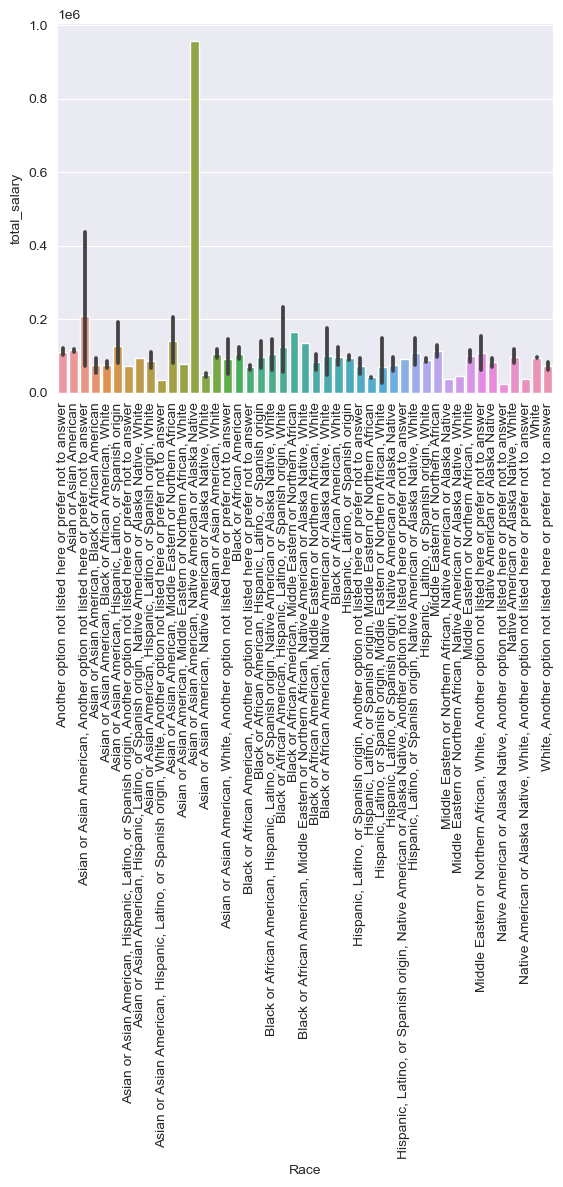

In [22]:
sns.barplot(data = df, x = 'Race', y = 'total_salary')
plt.xticks(rotation=90)

In [23]:
pd.pivot_table(data = df, index='Race', values = 'total_salary', aggfunc=np.mean).sort_values(by='total_salary', ascending=False)

,total_salary
Race,
"Asian or Asian American, Native American or Alaska Native",958000.000000
"Asian or Asian American, Another option not listed here or prefer not to answer",209360.485426
"Black or African American, Middle Eastern or Northern African",166000.000000
"Asian or Asian American, Middle Eastern or Northern African",140750.000000
"Black or African American, Middle Eastern or Northern African, Native American or Alaska Native, White",136000.000000
"Asian or Asian American, Hispanic, Latino, or Spanish origin",127698.076923
"Black or African American, Hispanic, Latino, or Spanish origin, White",125399.090909
Asian or Asian American,115532.036597
Middle Eastern or Northern African,113858.390355


## Asian or Asian American, Native American or Alaska Native have the highest average salary by far

### lets make further analysis on the top 10 industries like we did with the Gender

In [24]:
pd.pivot_table(data = df[df['Industry'].isin(top_10_industries.keys())], index= ['Industry' ,'Race'], values = 'total_salary', aggfunc=np.mean).sort_values('total_salary', ascending=False)

,,total_salary
Industry,Race,
computing or tech,"Asian or Asian American, Native American or Alaska Native",958000.000000
"marketing, advertising & pr","Black or African American, Hispanic, Latino, or Spanish origin",540000.000000
computing or tech,"Asian or Asian American, Another option not listed here or prefer not to answer",466288.011995
"accounting, banking & finance","Black or African American, Hispanic, Latino, or Spanish origin, White",336925.000000
education (primary/secondary),"Black or African American, White",330000.000000
...,...,...
health care,"Hispanic, Latino, or Spanish origin, Native American or Alaska Native, White",38400.000000
engineering or manufacturing,"Hispanic, Latino, or Spanish origin, Middle Eastern or Northern African, White",36000.000000
health care,"White, Another option not listed here or prefer not to answer",35000.000000


## from the pivot table above we can see that our calculations were wrong because the average salary for Asian or Asian American, Native American or Alaska Native is only the highest in the computing or tech industry not in all industries, and it's the only row that has this race value
## if we looked in the other values we will see that the race differs from one industry to another and there is no gap in salary like the one we got with Gender

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51]),
 [Text(0, 0, 'Alabama'),
  Text(1, 0, 'Alaska'),
  Text(2, 0, 'Arizona'),
  Text(3, 0, 'Arkansas'),
  Text(4, 0, 'California'),
  Text(5, 0, 'Colorado'),
  Text(6, 0, 'Connecticut'),
  Text(7, 0, 'Delaware'),
  Text(8, 0, 'District of Columbia'),
  Text(9, 0, 'Florida'),
  Text(10, 0, 'Georgia'),
  Text(11, 0, 'Hawaii'),
  Text(12, 0, 'Idaho'),
  Text(13, 0, 'Illinois'),
  Text(14, 0, 'Indiana'),
  Text(15, 0, 'Iowa'),
  Text(16, 0, 'Kansas'),
  Text(17, 0, 'Kentucky'),
  Text(18, 0, 'Louisiana'),
  Text(19, 0, 'Maine'),
  Text(20, 0, 'Maryland'),
  Text(21, 0, 'Massachusetts'),
  Text(22, 0, 'Michigan'),
  Text(23, 0, 'Minnesota'),
  Text(24, 0, 'Mississippi'),
  Text(25, 0, 'Missouri'),
  Text(26, 0, 'Montana'),
  Text(27, 0, 'Nebraska'),
  Text(

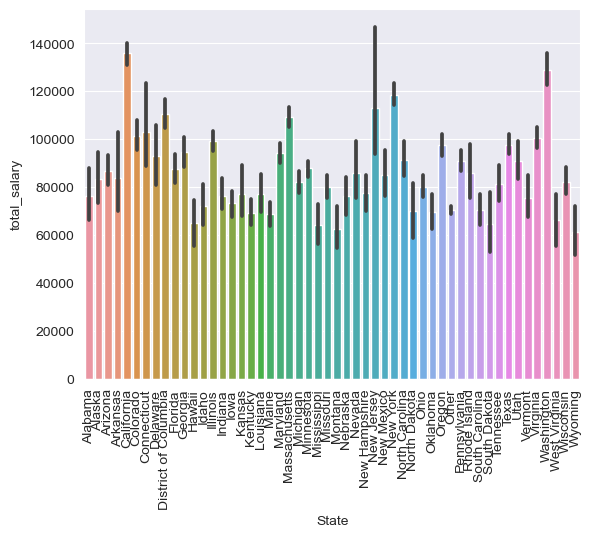

In [25]:
sns.barplot(data = df, x = 'State', y = 'total_salary')
plt.xticks(rotation=90)

In [26]:
pd.pivot_table(data = df, index='State', values = 'total_salary', aggfunc=np.mean).sort_values(by='total_salary', ascending=False)

,total_salary
State,
California,135781.453572
Washington,128938.116531
New York,118623.651920
New Jersey,113066.022742
District of Columbia,110477.203463
Massachusetts,109261.519663
Connecticut,103136.959821
Colorado,101237.761269
Virginia,100494.614514


## California has the highest average salary and the other states are close to each other

In [27]:
# get the top 10 cities
top_10_cities = dict(df['City'].value_counts().head(10))

In [28]:
pd.pivot_table(data = df[df['City'].isin(top_10_cities.keys())], index='City', values = 'total_salary', aggfunc=np.mean).sort_values(by='total_salary', ascending=False)

,total_salary
City,
San Francisco,194327.652336
Seattle,146027.617391
New York City,130994.924353
Los Angeles,115520.683084
Boston,114883.404669
Washington,112498.951845
Chicago,108169.983312
Portland,100887.567130
London,83827.025735


## Like we expected because California has the highest average salary, San Francisco City has the highest average salary

In [29]:
# get the top 10 job titles
top_10_job_titles = dict(df['Job title'].value_counts().head(10))

In [30]:
pd.pivot_table(data = df[df['Job title'].isin(top_10_job_titles.keys())], index='Job title', values = 'total_salary', aggfunc=np.mean).sort_values(by='total_salary', ascending=False)

,total_salary
Job title,
senior software engineer,181409.539886
software engineer,166794.531752
director,145561.605602
product manager,142100.002722
manager,105670.060538
program manager,98258.508426
project manager,91643.005176
executive assistant,69092.983051
librarian,69010.319318


## Software Engineer has the highest average salary

## lets see which jobs have the highest average bonus

In [31]:
pd.pivot_table(data = df[df['Job title'].isin(top_10_job_titles.keys())], index='Job title', values = 'Bonus', aggfunc=np.mean).sort_values(by='Bonus', ascending=False)

,Bonus
Job title,
product manager,30455.343511
software engineer,30217.489933
senior software engineer,22504.526570
director,19955.903226
manager,9410.563910
program manager,8309.130952
project manager,4760.802521
executive assistant,3794.656489
teacher,1020.979866


## Product manager and Software Engineer have the highest average bonus, and this is expected because they are the highest paying jobs

# Feature Selection
## some columns have too many values, and we can't use them in our model because after making dummy variables the dataframe will have many columns and they won't affect the model's performance, so we will get the top 3500 values in each column and drop the rest

In [32]:
df.shape

(25471, 14)

In [33]:
# get top 3500 values in each column
top_10_job_titles = dict(df['Job title'].value_counts().head(3500))
top_10_industries = dict(df['Industry'].value_counts().head(3500))
top_10_states = dict(df['State'].value_counts().head(52))
top_10_cities = dict(df['City'].value_counts().head(3500))
df = df[df['Job title'].isin(top_10_job_titles.keys())]
df = df[df['Industry'].isin(top_10_industries.keys())]
df = df[df['State'].isin(top_10_states.keys())]
df = df[df['City'].isin(top_10_cities.keys())]

In [34]:
df.shape

(16730, 14)

## lets drop salary and bonus columns because we already have total_salary column

In [35]:
df.drop(['Salary', 'Bonus'], axis=1, inplace=True)

In [36]:
df

,Job title,Age,Industry,total_salary,Country,State,City,Overall_experience,Field_experience,Degree,Gender,Race
0,research and instruction librarian,25-34,education (higher education),55000.000000,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,marketing specialist,25-34,"accounting, banking & finance",34000.000000,United States,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
2,program manager,25-34,nonprofits,65000.000000,United States,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
3,accounting manager,25-34,"accounting, banking & finance",67000.000000,United States,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White
6,librarian,25-34,education (primary/secondary),50000.000000,United States,Arizona,Yuma,5-7 years,5-7 years,Master's degree,Man,White
...,...,...,...,...,...,...,...,...,...,...,...,...
25462,teacher,35-44,education (primary/secondary),71165.688432,Australia,Other,"Maitland, NSW",5-7 years,5-7 years,College degree,Woman,White
25463,mechanical engineer,25-34,engineering or manufacturing,77300.000000,United States,Kentucky,Erlanger,2 - 4 years,2 - 4 years,Master's degree,Woman,Asian or Asian American
25465,technical director,35-44,real estate / housing,124085.300000,Germany,Other,Nürnberg,11 - 20 years,8 - 10 years,Master's degree,Man,White
25466,waitress,18-24,hospitality & events,45000.000000,United States,New York,Rochester,5-7 years,2 - 4 years,Some college,Woman,White


## lets see if any outliers exist in the total_salary column

<Axes: xlabel='total_salary'>

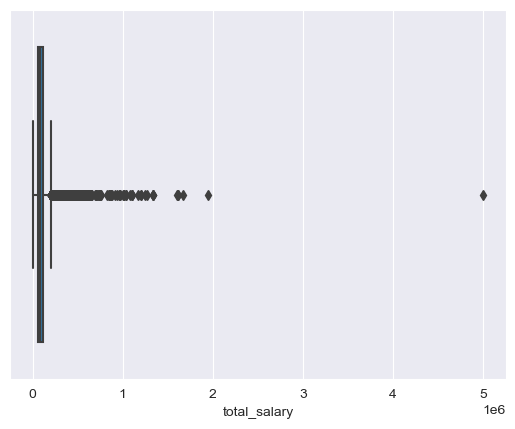

In [37]:
sns.boxplot(data=df, x='total_salary')

<Axes: >

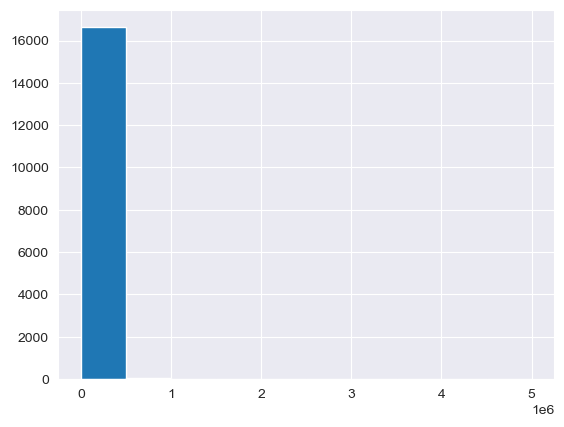

In [38]:
df['total_salary'].hist()

## there are many outliers in the total_salary column, so we will remove them

In [39]:
# get the 25th and 75th percentiles
Q1 = df['total_salary'].quantile(0.25)
Q3 = df['total_salary'].quantile(0.75)
# get the interquartile range
IQR = Q3 - Q1
# get the upper and lower bounds
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

In [40]:
IQR

59000.0

In [41]:
print(upper_bound, lower_bound)

204500.0 -31500.0


In [42]:
#see how many outliers exist
df[(df['total_salary'] > upper_bound) | (df['total_salary'] < lower_bound)].shape[0]

983

In [43]:
df.shape

(16730, 12)

In [44]:
# remove the outliers
df = df[(df['total_salary'] < upper_bound) & (df['total_salary'] > lower_bound)]

In [45]:
df.shape

(15747, 12)

<Axes: xlabel='total_salary'>

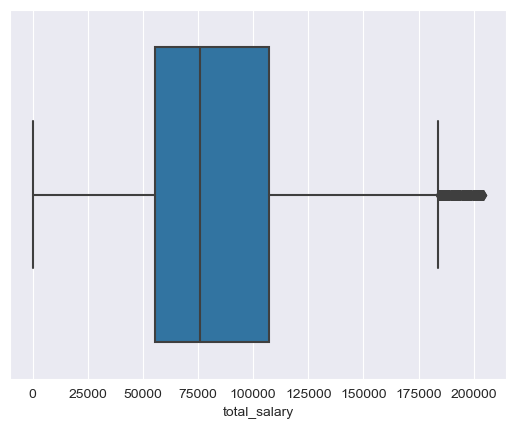

In [46]:
sns.boxplot(data=df, x='total_salary')

<Axes: >

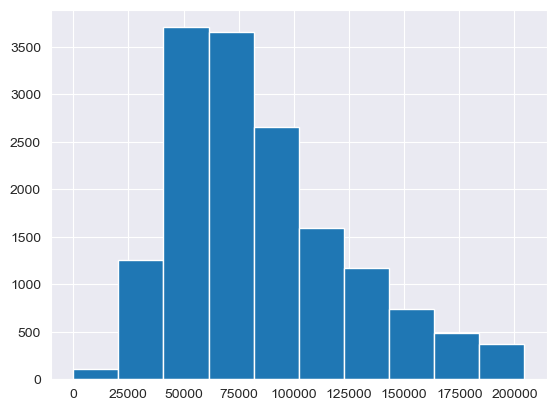

In [47]:
df['total_salary'].hist()

## now the total_salary column looks better but still not perfect, so we will remove any value that is less than 10000

In [48]:
# get the 25th and 75th percentiles
Q1 = df['total_salary'].quantile(0.25)
Q3 = df['total_salary'].quantile(0.75)
# get the interquartile range
IQR = Q3 - Q1
# get the upper and lower bounds
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

In [49]:
IQR

51500.0

In [50]:
print(upper_bound, lower_bound)

184250.0 -21750.0


In [51]:
#see how many outliers exist
df[(df['total_salary'] > upper_bound) | (df['total_salary'] < lower_bound)].shape[0]

372

In [52]:
# remove the outliers

In [53]:
df = df[(df['total_salary'] < upper_bound) & (df['total_salary'] > lower_bound)]

In [54]:
df.shape

(15375, 12)

<Axes: xlabel='total_salary'>

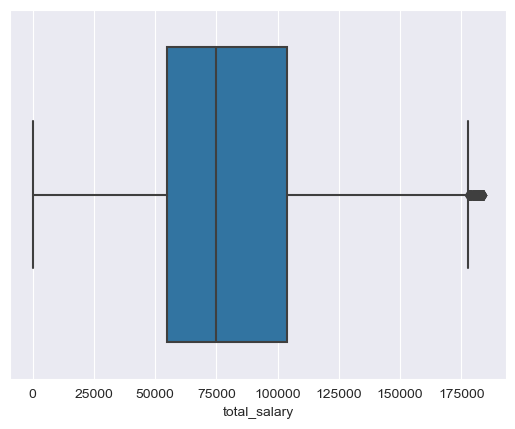

In [55]:
sns.boxplot(data=df, x='total_salary')


<Axes: >

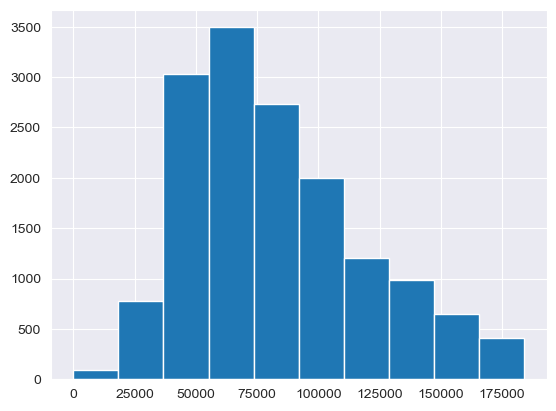

In [56]:
df['total_salary'].hist()

In [57]:
df = df[df['total_salary'] > 10000]

In [58]:
df.shape

(15323, 12)

<Axes: xlabel='total_salary'>

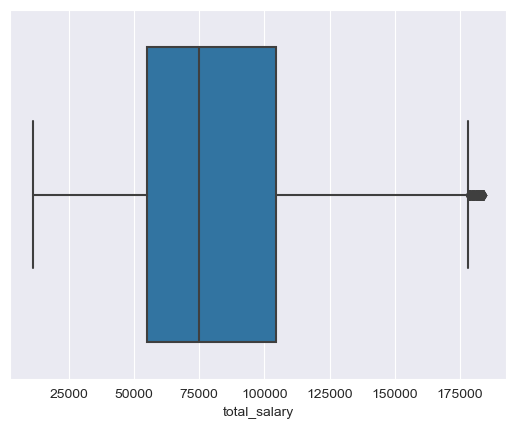

In [59]:
sns.boxplot(data=df, x='total_salary')

<Axes: >

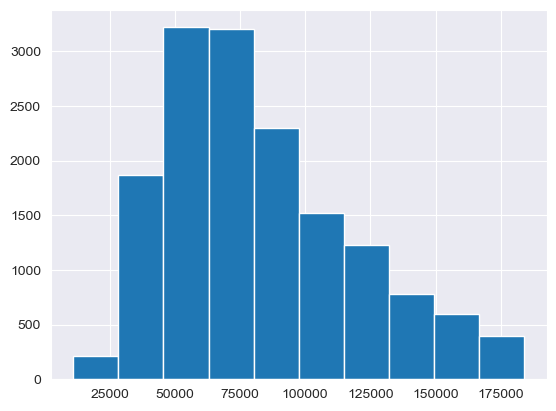

In [60]:
df['total_salary'].hist()

<Axes: xlabel='total_salary'>

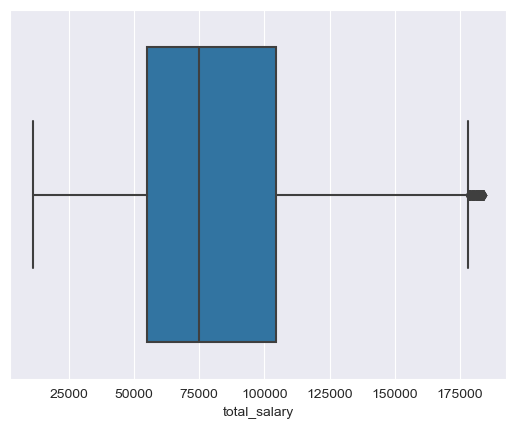

In [61]:
sns.boxplot(data=df, x='total_salary')

<Axes: >

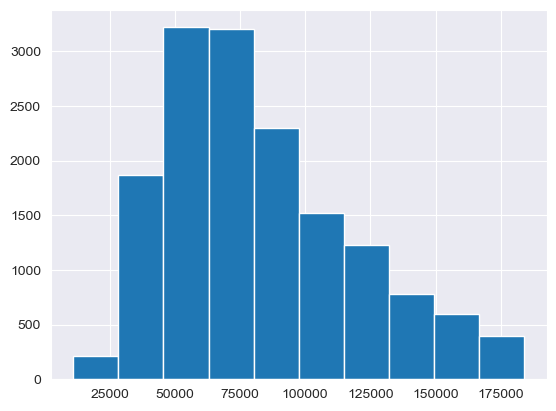

In [62]:
df['total_salary'].hist()

In [63]:
# sns.boxplot(data=df[df['City'].isin()], x='total_salary')

In [64]:
df.to_csv('EDA_data.csv', index=False)